In [2]:
import os
import pandas as pd

# Define the directory where CSV files are stored
data_dir = "./Posture Sample Data"  # Change this to your actual directory

# Dictionary to store all data
all_data = []

# Iterate through all files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        # Extract posture type and participant ID from filename (adjust parsing as needed)
        parts = filename.split("_")  
        participant_id = parts[1]  # Adjust index based on filename structure
        posture = posture = parts[2].replace(".csv", "")  # Adjust index based on filename structure

        # Load the CSV file
        file_path = os.path.join(data_dir, filename)
        df = pd.read_csv(file_path)

        # Add metadata columns
        df["participant_id"] = participant_id
        df["posture"] = posture

        # Store in list
        all_data.append(df)

# Merge all data into one DataFrame
df_all = pd.concat(all_data, ignore_index=True)

# Save merged dataset (optional)
df_all.to_csv("merged_pressure_data.csv", index=False)

# Display dataset info
print(df_all.info())
print(df_all.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3165 entries, 0 to 3164
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sensor_1        3165 non-null   float64
 1   Sensor_2        3165 non-null   float64
 2   Sensor_3        3165 non-null   float64
 3   Sensor_4        3165 non-null   float64
 4   Sensor_5        3165 non-null   float64
 5   Sensor_6        3165 non-null   float64
 6   Sensor_7        3165 non-null   float64
 7   Sensor_8        3165 non-null   float64
 8   Sensor_9        3165 non-null   float64
 9   Sensor_10       3165 non-null   float64
 10  Sensor_11       3165 non-null   float64
 11  Sensor_12       3165 non-null   float64
 12  Sensor_13       3165 non-null   float64
 13  participant_id  3165 non-null   object 
 14  posture         3165 non-null   object 
dtypes: float64(13), object(2)
memory usage: 371.0+ KB
None
   Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  Sensor_6  Senso

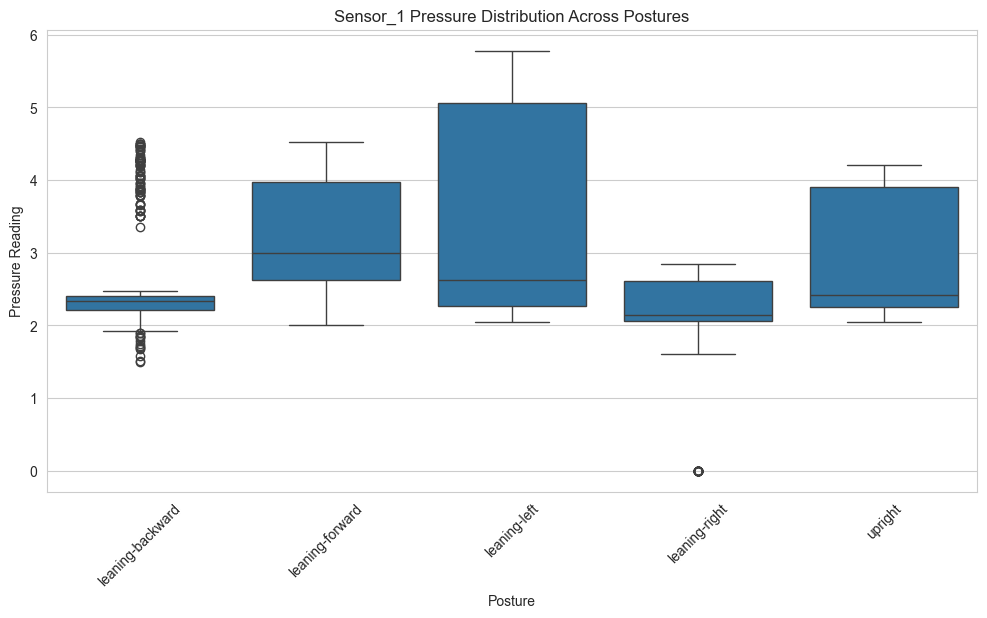

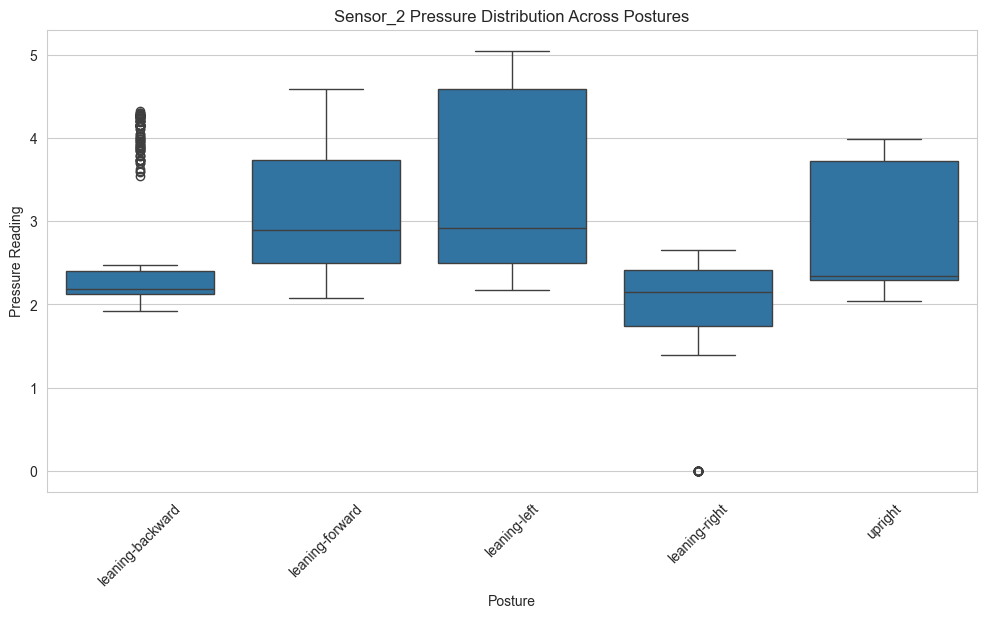

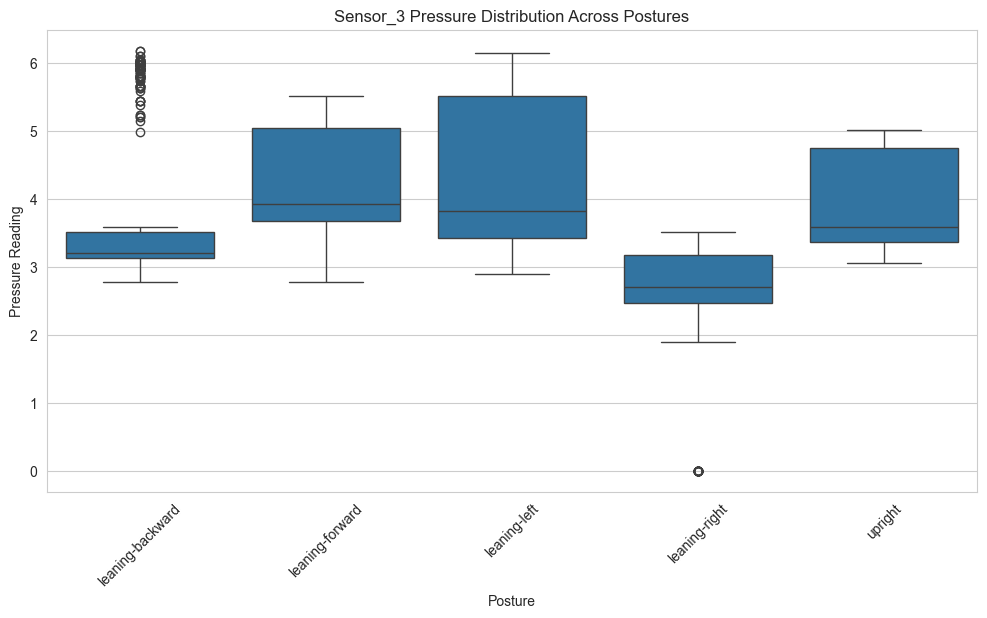

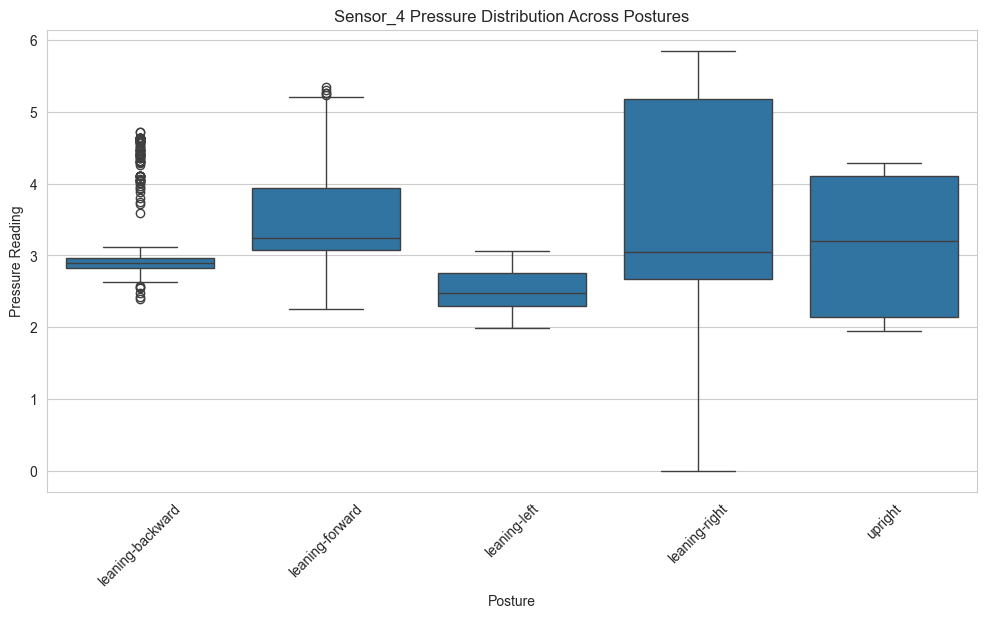

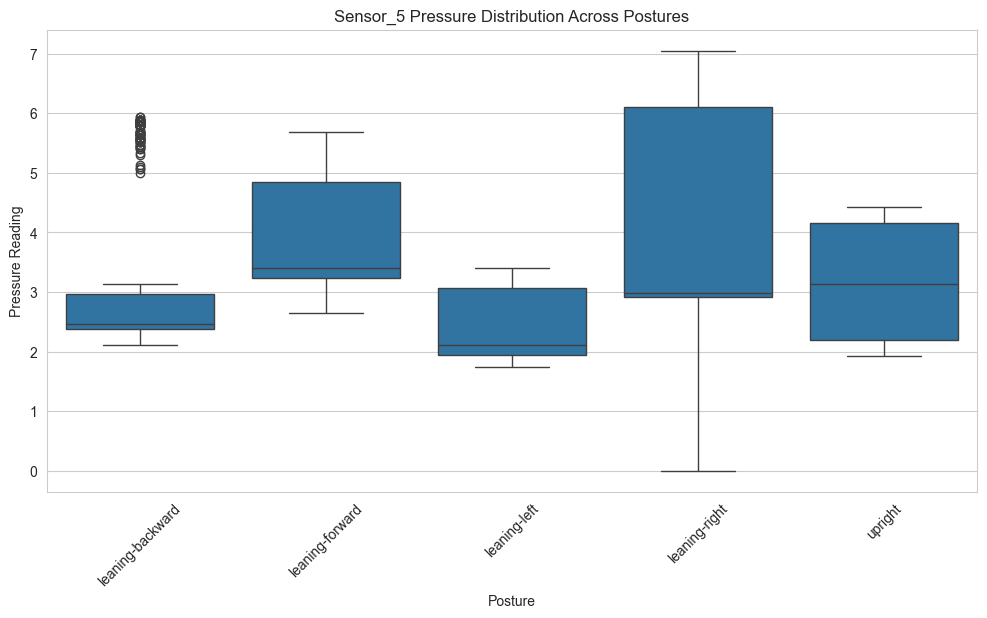

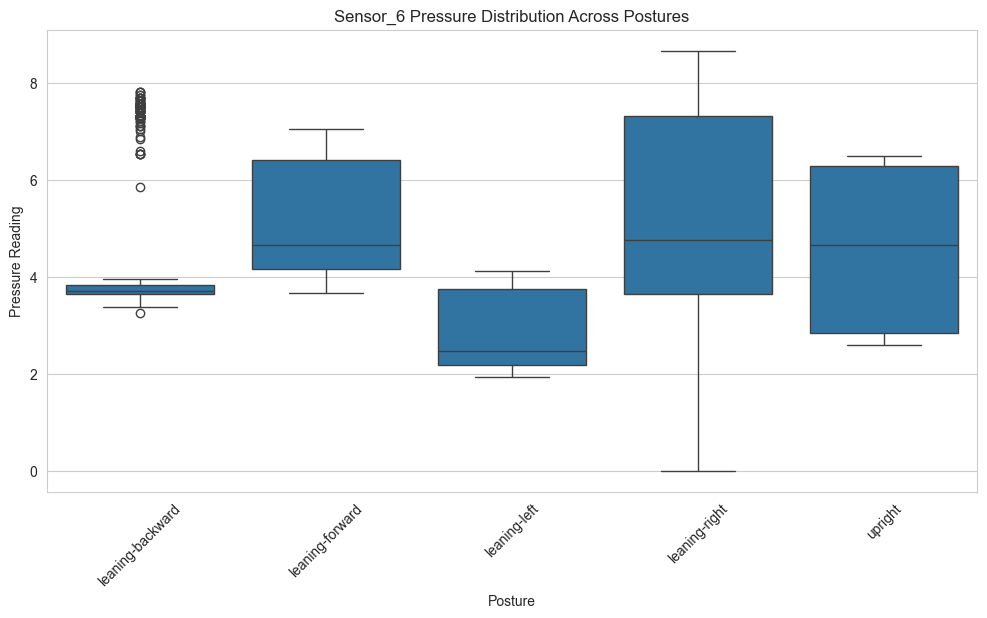

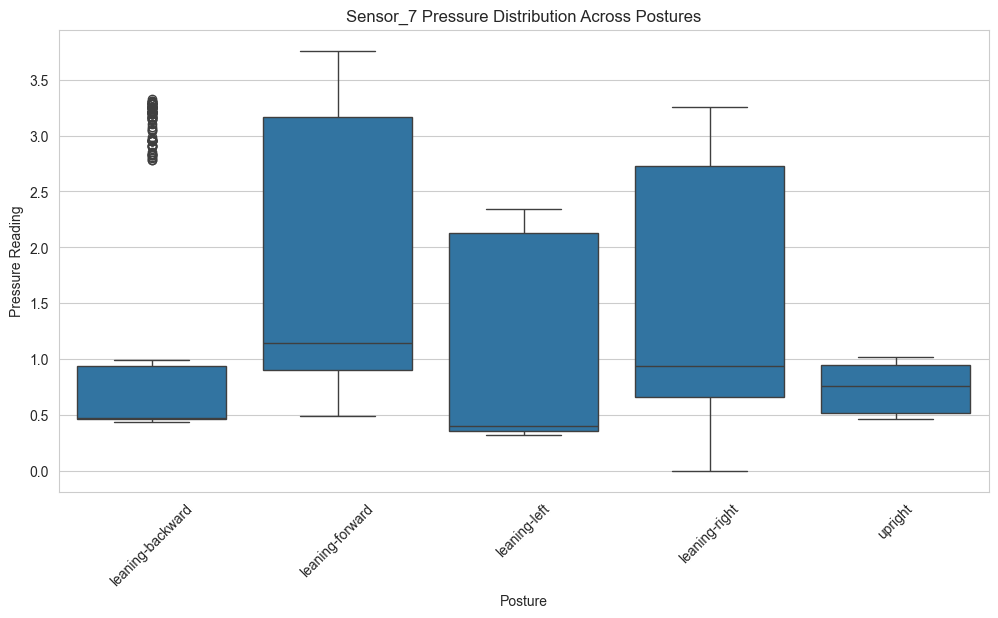

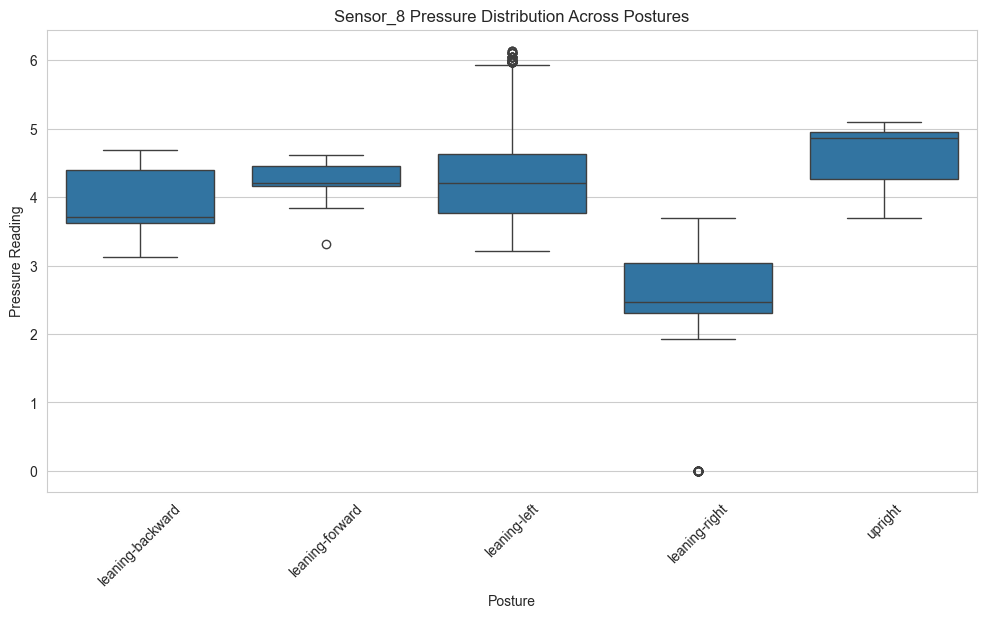

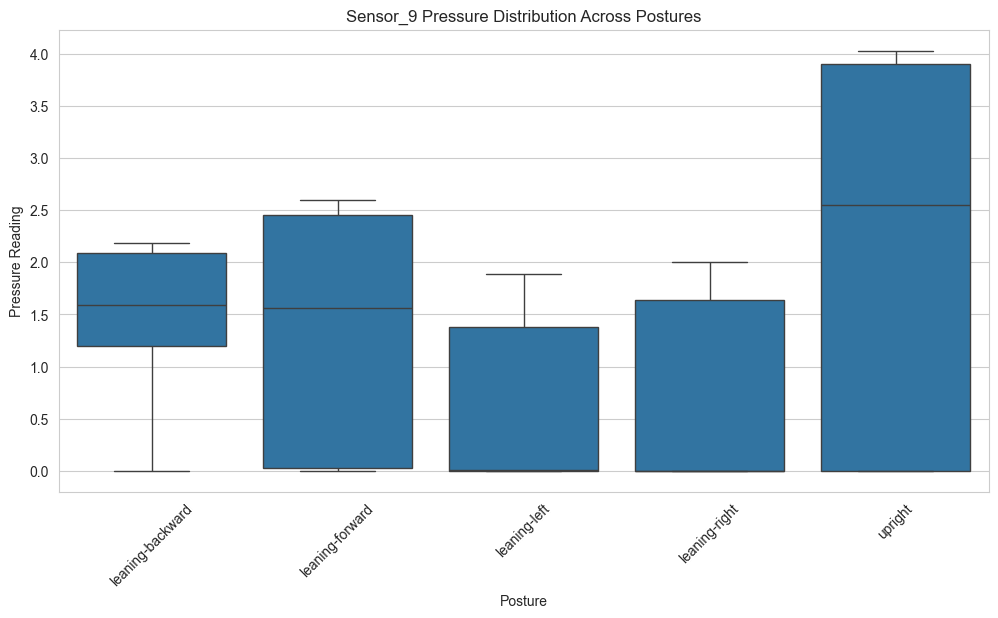

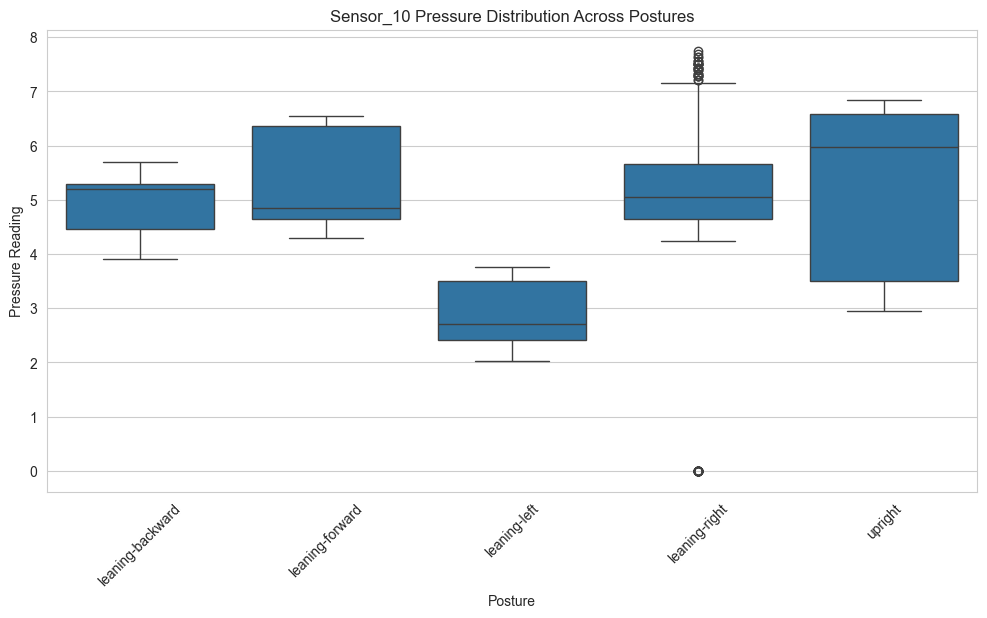

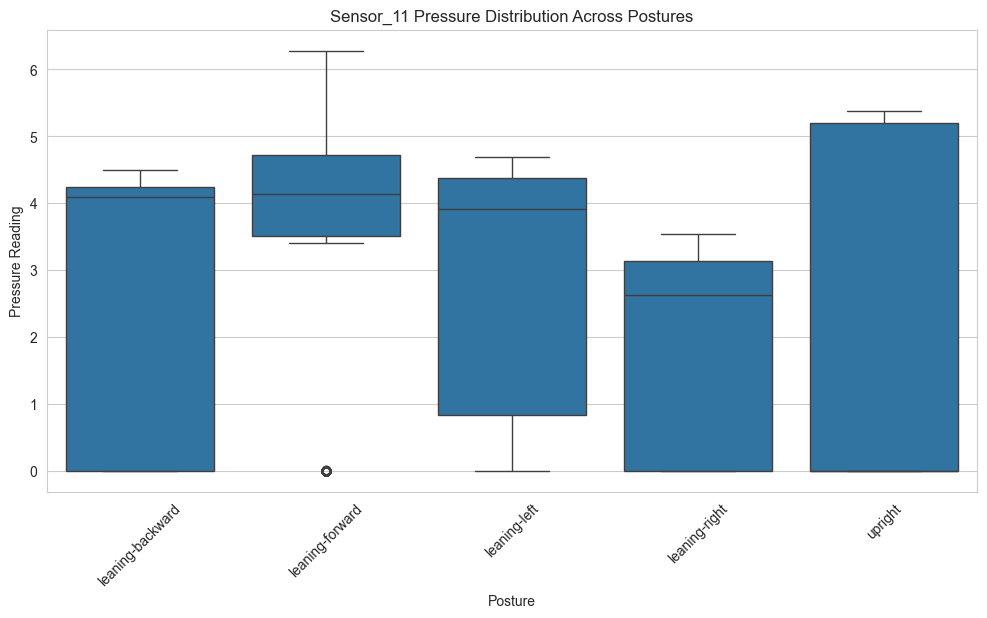

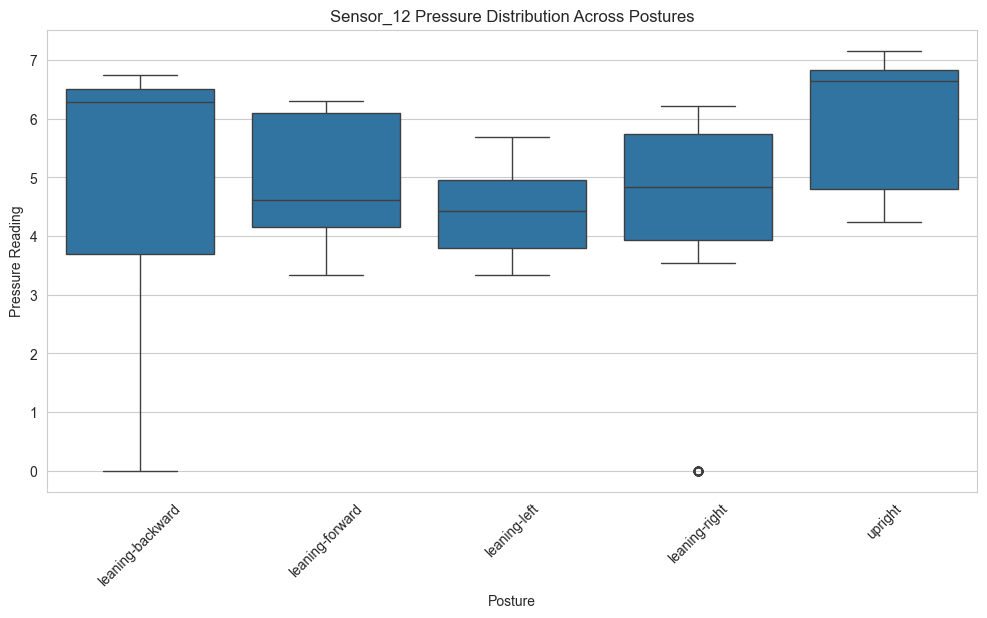

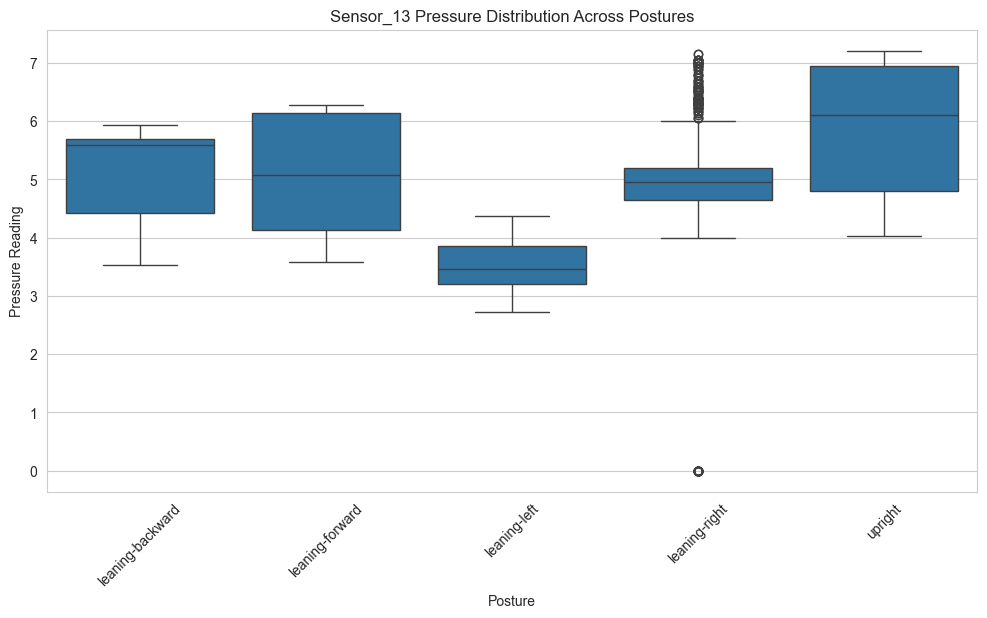

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global figure style
sns.set_style("whitegrid")

# Get the list of sensor columns
sensor_columns = [col for col in df_all.columns if col.startswith("Sensor_")]

# Create boxplots for each sensor
for sensor in sensor_columns:
    plt.figure(figsize=(12, 6))  # Set figure size
    sns.boxplot(x="posture", y=sensor, data=df_all)  
    plt.title(f"{sensor} Pressure Distribution Across Postures")
    plt.xlabel("Posture")
    plt.ylabel("Pressure Reading")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()


In [6]:
import pandas as pd

# Compute mean and standard deviation for each sensor per posture
sensor_columns = [col for col in df_all.columns if col.startswith("Sensor_")]

summary_stats = df_all.groupby("posture")[sensor_columns].agg(['mean', 'std'])
print(summary_stats)


                  Sensor_1            Sensor_2            Sensor_3            \
                      mean       std      mean       std      mean       std   
posture                                                                        
leaning-backward  2.595527  0.729514  2.549852  0.735413  3.723882  1.018552   
leaning-forward   3.156662  0.698792  3.048905  0.653563  4.181456  0.666454   
leaning-left      3.267109  1.380216  3.255727  0.994656  4.205491  1.025643   
leaning-right     2.187000  0.575866  2.030441  0.558168  2.674147  0.711316   
upright           2.916146  0.818081  2.839518  0.732663  3.929109  0.671380   

                  Sensor_4            Sensor_5            ...  Sensor_9  \
                      mean       std      mean       std  ...      mean   
posture                                                   ...             
leaning-backward  3.129008  0.604006  3.147004  1.232692  ...  1.438565   
leaning-forward   3.593943  0.769382  3.853015  0.931003  .

In [9]:
import pandas as pd

# Identify sensor columns dynamically
sensor_columns = [col for col in df_all.columns if col.startswith("Sensor_")]

# Compute mean and standard deviation per posture
summary_stats = df_all.groupby("posture")[sensor_columns].agg(['mean', 'std'])

# DataFrame to store thresholds
thresholds_df = []

for posture in df_all["posture"].unique():
    for sensor in sensor_columns:
        mean_value = summary_stats.loc[posture, (sensor, 'mean')]
        std_value = summary_stats.loc[posture, (sensor, 'std')]

        lower_bound = mean_value - 2 * std_value
        upper_bound = mean_value + 2 * std_value

        thresholds_df.append({"posture": posture, "sensor": sensor, 
                              "lower_threshold": lower_bound, "upper_threshold": upper_bound})

# Convert to DataFrame
df_thresholds = pd.DataFrame(thresholds_df)

# Display
print(df_thresholds.head())

# Save thresholds to CSV
df_thresholds.to_csv("sensor_thresholds.csv", index=False)


            posture    sensor  lower_threshold  upper_threshold
0  leaning-backward  Sensor_1         1.136499         4.054556
1  leaning-backward  Sensor_2         1.079027         4.020678
2  leaning-backward  Sensor_3         1.686777         5.760987
3  leaning-backward  Sensor_4         1.920996         4.337021
4  leaning-backward  Sensor_5         0.681620         5.612389


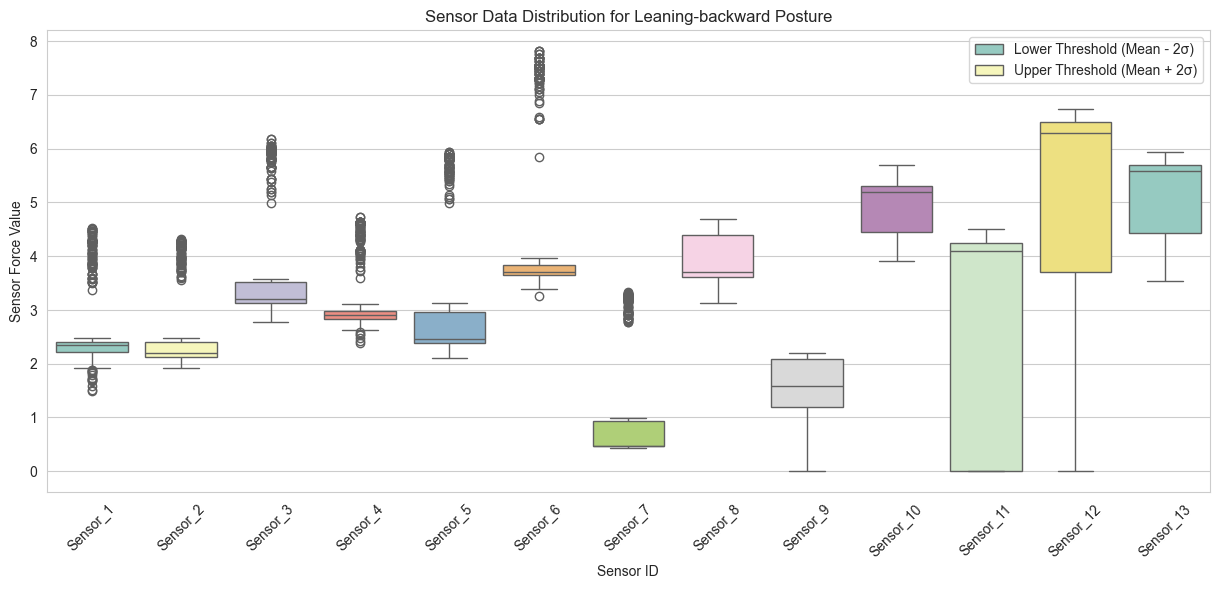

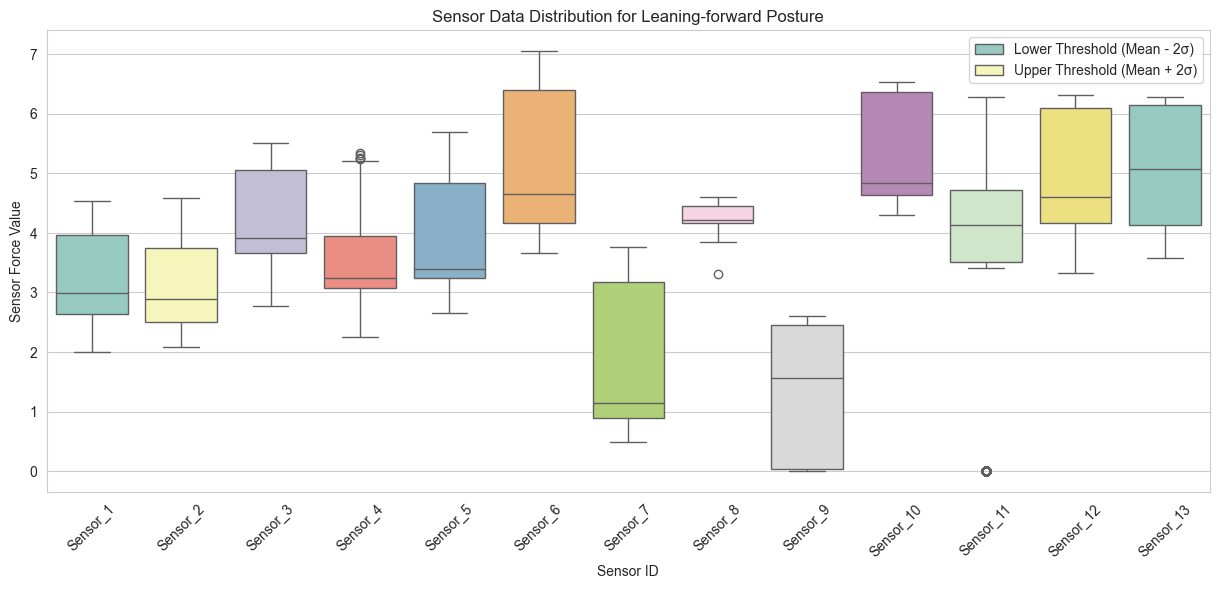

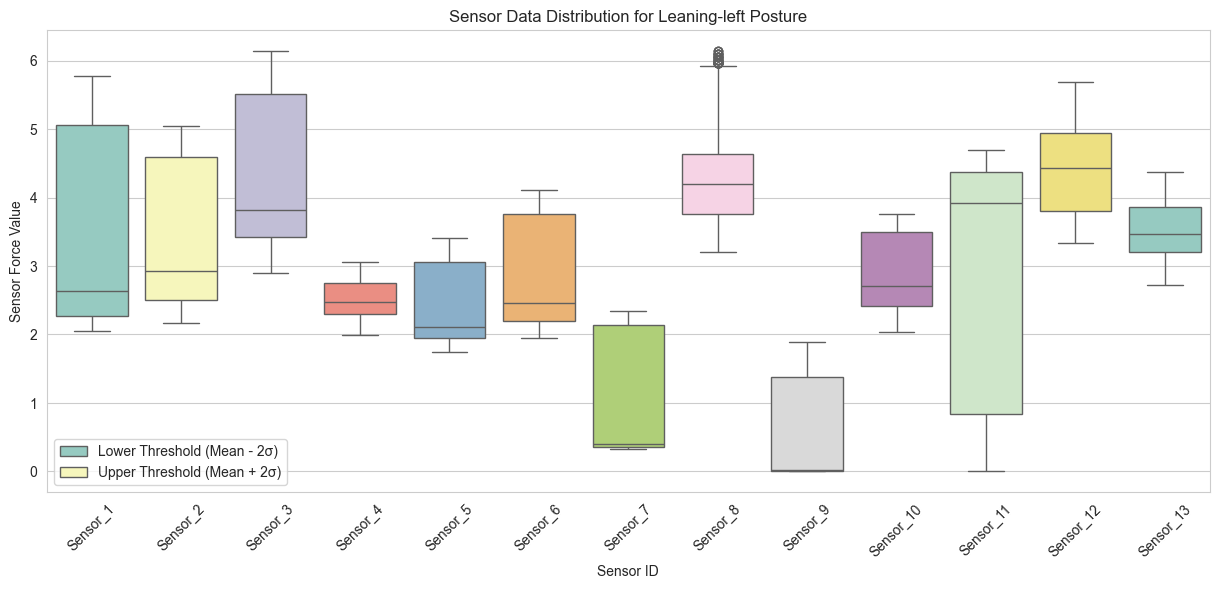

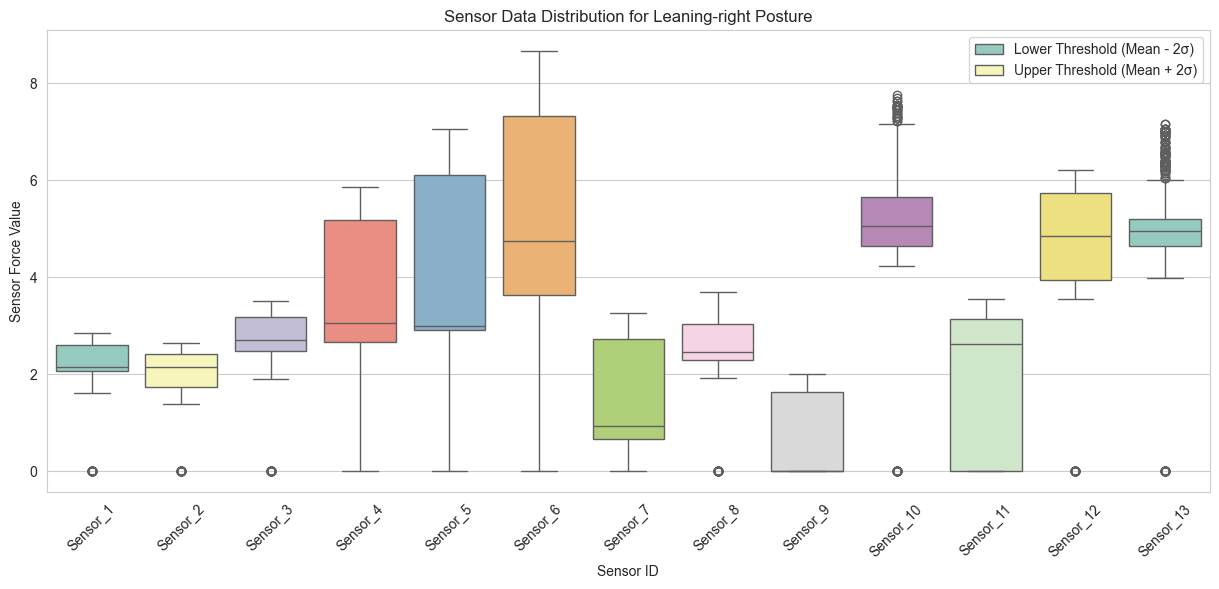

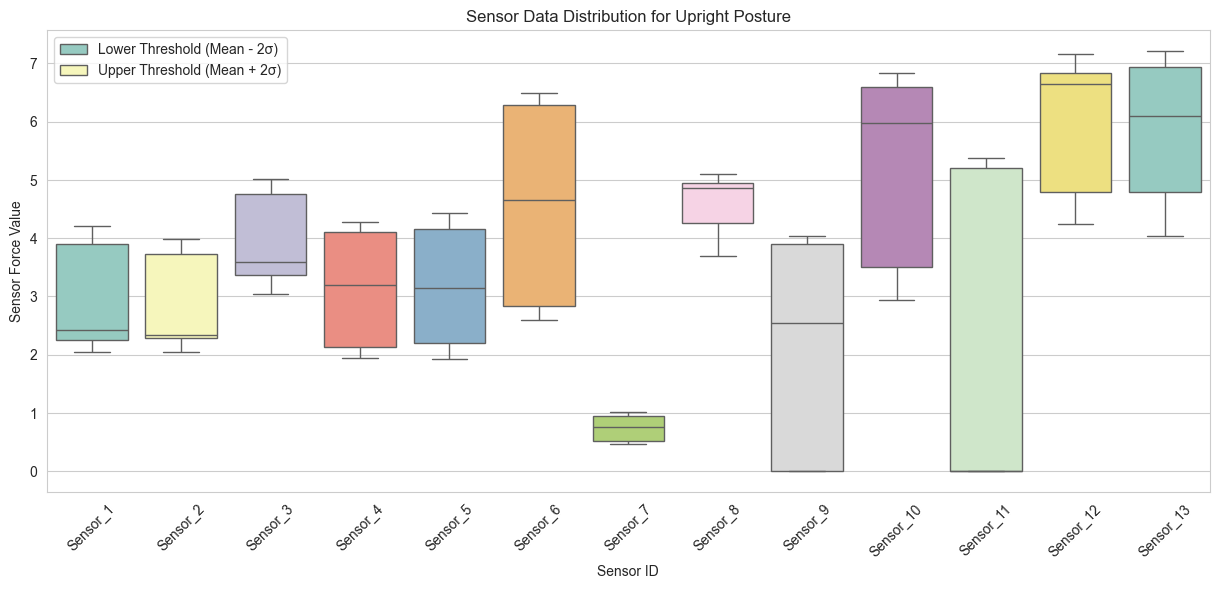

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify sensor columns dynamically
sensor_columns = [col for col in df_all.columns if col.startswith("Sensor_")]

# Compute summary statistics (Mean ± 2σ)
summary_stats = df_all.groupby("posture")[sensor_columns].agg(['mean', 'std'])

# Iterate through each posture and create visualizations
for posture in df_all["posture"].unique():
    plt.figure(figsize=(15, 6))
    
    # Extract data for the specific posture
    df_posture = df_all[df_all["posture"] == posture]

    # Create a boxplot for all sensors in this posture
    sns.boxplot(data=df_posture[sensor_columns], palette="Set3")

    # Overlay mean ± 2σ thresholds
    for i, sensor in enumerate(sensor_columns):
        mean_value = summary_stats.loc[posture, (sensor, 'mean')]
        std_value = summary_stats.loc[posture, (sensor, 'std')]
        lower_bound = mean_value - 2 * std_value
        upper_bound = mean_value + 2 * std_value

    plt.title(f"Sensor Data Distribution for {posture.capitalize()} Posture")
    plt.xticks(rotation=45)
    plt.ylabel("Sensor Force Value")
    plt.xlabel("Sensor ID")
    plt.legend(["Lower Threshold (Mean - 2σ)", "Upper Threshold (Mean + 2σ)"])
    plt.show()
